### Student Information
Name: Jean Carlos Guifarro Galvez

Student ID: 111065422

GitHub ID: jeanca95

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
#import pandas
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

#obtain the documents and convert them to pandas with labels
yelp=pd.read_csv('yelp_labelled.txt', sep = '\t', header = None, names = ['Review', 'Status'])
amazon=pd.read_csv('amazon_cells_labelled.txt', sep = '\t', header = None, names = ['Review', 'Status'])
imdb=pd.read_csv('imdb_labelled.txt', sep = '\t\n', header = None, names = ['Review'], engine='python')

review = [x.split('\t')[0] for x in imdb.Review]
status = [int(x.split('\t')[1]) for x in imdb.Review]
imdb['Review'] = review
imdb['Status'] = status

#print them to verify
print(yelp)
print(amazon)
print(imdb)

                                                Review  Status
0                             Wow... Loved this place.       1
1                                   Crust is not good.       0
2            Not tasty and the texture was just nasty.       0
3    Stopped by during the late May bank holiday of...       1
4    The selection on the menu was great and so wer...       1
..                                                 ...     ...
995  I think food should have flavor and texture an...       0
996                           Appetite instantly gone.       0
997  Overall I was not impressed and would not go b...       0
998  The whole experience was underwhelming, and I ...       0
999  Then, as if I hadn't wasted enough of my life ...       0

[1000 rows x 2 columns]
                                                Review  Status
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                             

In [4]:
#combine the 3 documents to have 1 dataset
data = pd.concat( (yelp,amazon,imdb), ignore_index=True)
data

,Review,Status
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2995,I just got bored watching Jessice Lange take h...,0
2996,"Unfortunately, any virtue in this film's produ...",0
2997,"In a word, it is embarrassing.",0
2998,Exceptionally bad!,0


In [5]:
data[0:3]

,Review,Status
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [6]:
len(data)

3000

In [7]:
# a simple query
data[:10][["Status"]]

,Status
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,1


In [8]:
# using loc (by label)
data.loc[1000:1010, 'Review']

1000    So there is no way for me to plug it in here i...
1001                          Good case, Excellent value.
1002                               Great for the jawbone.
1003    Tied to charger for conversations lasting more...
1004                                    The mic is great.
1005    I have to jiggle the plug to get it to line up...
1006    If you have several dozen or several hundred c...
1007          If you are Razr owner...you must have this!
1008                  Needless to say, I wasted my money.
1009                     What a waste of money and time!.
1010                      And the sound quality is great.
Name: Review, dtype: object

In [9]:
# using iloc (by position)
data.iloc[:10, 1]

0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    1
Name: Status, dtype: int64

In [10]:
# Look for the first 10 with Status 1 every 10th record
# Answer here
data[data['Status']==1].iloc[::10][0:10]

,Review,Status
0,Wow... Loved this place.,1
23,I could care less... The interior is just beau...,1
40,The shrimp tender and moist.,1
55,"Loved it...friendly servers, great food, wonde...",1
70,"The deal included 5 tastings and 2 drinks, and...",1
93,Best breakfast buffet!!!,1
106,"The food was delicious, our bartender was atte...",1
124,We thought you'd have to venture further away ...,1
144,Nice blanket of moz over top but i feel like t...,1
162,"Their menu is diverse, and reasonably priced.",1


In [11]:
# check missing values
data.isnull()

,Review,Status
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [12]:
data.isnull().apply(lambda data: dmh.check_missing_values(data))

,Review,Status
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [13]:
#calculate the missing values in every record instead of every column
data.isnull().apply(lambda data: dmh.check_missing_values(data), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [14]:
#look for duplicate data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [15]:
sum(data.duplicated())

17

In [16]:
sum(data.duplicated('Review'))

17

In [17]:
#drop the duplicated
data.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

In [18]:
#verify the new size
len(data)

2983

In [19]:
#verify for duplicated data again
sum(data.duplicated())

0

In [20]:
#take a sample
data_sample = data.sample(n=1000) #random state

In [21]:
data_sample

,Review,Status
477,The steaks are all well trimmed and also perfe...,1
986,Shrimp- When I unwrapped it (I live only 1/2 a...,0
1176,"I connected my wife's bluetooth,(Motorola HS85...",1
2069,The performances are not improved by improvisa...,0
669,Google mediocre and I imagine Smashburger will...,0
...,...,...
1457,Nice solid keyboard.,1
2130,There was NO chemistry between Ben Affleck and...,0
1647,Great phone.,1
48,If you want a sandwich just go to any Firehous...,1


In [22]:
#in the sample are there more positive or negative reviews
positive_sample=data_sample[data_sample['Status']==1]

negative_sample=data_sample[data_sample['Status']==0]

print(positive_sample)
print(negative_sample)

                                                 Review  Status
477   The steaks are all well trimmed and also perfe...       1
1176  I connected my wife's bluetooth,(Motorola HS85...       1
285                             Great Pizza and Salads!       1
349   I have eaten here multiple times, and each tim...       1
469   This was my first and only Vegas buffet and it...       1
...                                                 ...     ...
577        Service was good and the company was better!       1
1295   This is hands down the best phone I've ever had.       1
1457                               Nice solid keyboard.       1
1647                                       Great phone.       1
48    If you want a sandwich just go to any Firehous...       1

[516 rows x 2 columns]
                                                 Review  Status
986   Shrimp- When I unwrapped it (I live only 1/2 a...       0
2069  The performances are not improved by improvisa...       0
669   Google med

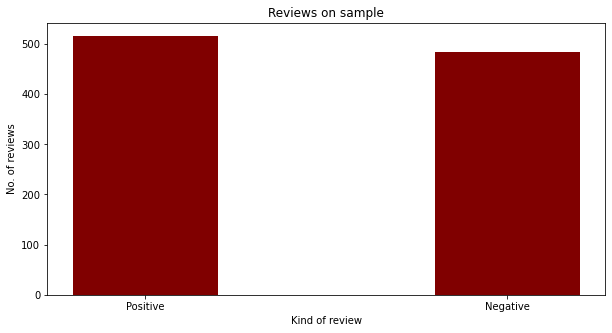

In [23]:
#Bar Graph comparison in sample of reviews
import numpy as np
import matplotlib.pyplot as plt

data_graph_sample = {'Positive':len(positive_sample), 'Negative':len(negative_sample)}
reviews = list(data_graph_sample.keys())
values = list(data_graph_sample.values())
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(reviews, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Kind of review")
plt.ylabel("No. of reviews")
plt.title("Reviews on sample")
plt.show()

In [24]:
#Bar graph of total reviews comparison
positive_total=data[data['Status']==1].iloc[::][:]

negative_total=data[data['Status']==0].iloc[::][:]

print(positive_total)
print(negative_total)

                                                 Review  Status
0                              Wow... Loved this place.       1
3     Stopped by during the late May bank holiday of...       1
4     The selection on the menu was great and so wer...       1
8                             The fries were great too.       1
9                                        A great touch.       1
...                                                 ...     ...
2989  :) Anyway, the plot flowed smoothly and the ma...       1
2990  The opening sequence of this gem is a classic,...       1
2991             Fans of the genre will be in heaven.         1
2992                Lange had become a great actress.         1
2993                It looked like a wonderful story.         1

[1490 rows x 2 columns]
                                                 Review  Status
1                                    Crust is not good.       0
2             Not tasty and the texture was just nasty.       0
5        Now I 

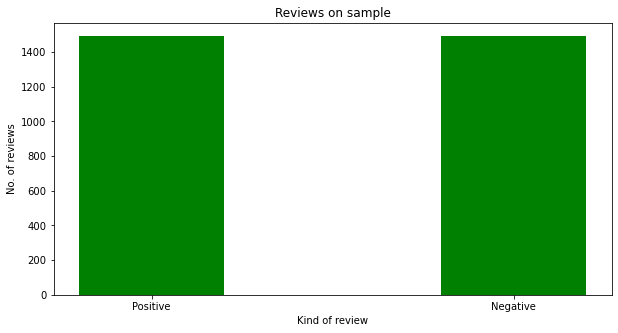

In [25]:
data_graph_total = {'Positive':len(positive_total), 'Negative':len(negative_total)}
reviews = list(data_graph_total.keys())
values = list(data_graph_total.values())
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(reviews, values, color ='green',
        width = 0.4)
 
plt.xlabel("Kind of review")
plt.ylabel("No. of reviews")
plt.title("Reviews on sample")
plt.show()

In [26]:
#tokenize the data
data['unigrams'] = data['Review'].apply(lambda x: dmh.tokenize_text(x))

In [27]:
data[0:5]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
4    [The, selection, on, the, menu, was, great, an...
Name: unigrams, dtype: object

In [28]:
data[0:5]

,Review,Status,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.Review) #learn the vocabulary and return document-term matrix
print(data_counts[0])

  (0, 5112)	1
  (0, 2711)	1
  (0, 4558)	1
  (0, 3351)	1


In [30]:
#create the analyze
analyze = count_vect.build_analyzer()

In [31]:
analyze(data.Review[0])

['wow', 'loved', 'this', 'place']

In [32]:
# We can check the shape of this matrix by:
data_counts.shape

(2983, 5155)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Review'].values.astype(str))

x.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:400]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005',
       '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30',
       '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44',
       '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb',
       '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85',
       '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned',
       'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad',
       'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse',
       'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable',
       'access', 'accessable', 'accessible', 'accessing', 'accessory',
       'accessoryone', 'accident', 'accidentally', 'acclaimed',
       'accolades', 'accommodations', 'accomodate', 'accompanied',
       'according

In [50]:
# max(term_frequencies)
term_frequencies1 = np.asarray(data_counts.sum(axis=0))[0]

In [51]:
new_plt = pd.DataFrame(term_frequencies1, columns=['occur'])
new_plt['terms'] = count_vect.get_feature_names_out()
new_plt

,occur,terms
0,1,00
1,36,10
2,3,100
3,2,11
4,4,12
...,...,...
5150,1,z500a
5151,6,zero
5152,1,zillion
5153,2,zombie


In [55]:
#the first 100 terms with most occurance

            
import plotly.express as px
new_plt.sort_values(by='occur', inplace=True, ascending=False)
new_plt

fig = px.bar(new_plt[:100], x="terms", y="occur", title="Word Frequency Input")
fig.show()

In [35]:
# we convert from sparse array to normal array
data_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
import numpy as np
words=0
matrixcounter=0
terms=[]
data_final = []
while words<=50:
    data_while=data_counts[matrixcounter, 0:20].toarray()
    matrixcounter+=1
    if data_while.sum()>1:
        data_final.append(list(data_while[0]))
        words+=1
        terms.append(matrixcounter)
         
    if matrixcounter>=2257: break
(terms)
data_final = np.array(data_final)
data_final

array([[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [37]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in (terms)[0:len(terms)]]

plot_z = data_final[0:len(terms), 0:20]
plot_z

array([[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

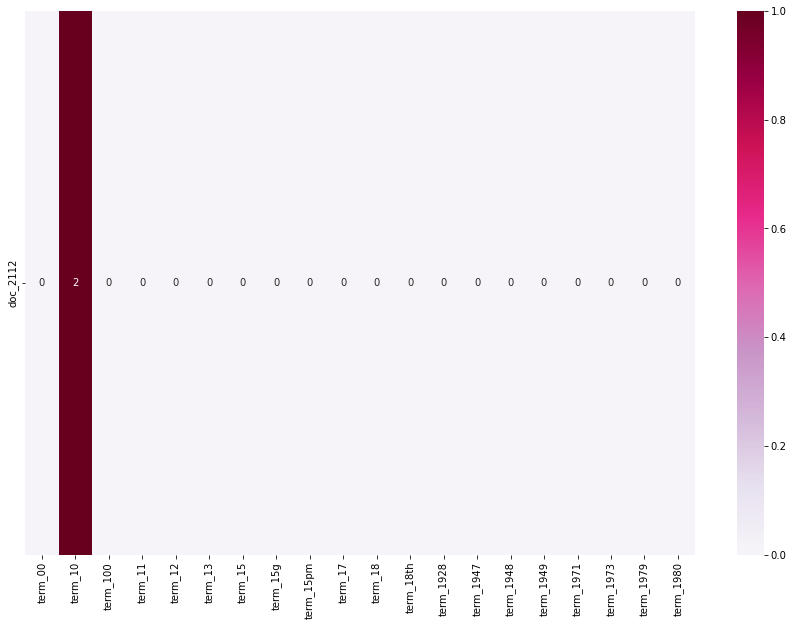

In [38]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [40]:
data.head()

,Review,Status,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."


In [41]:
X = data.drop(['Status'], axis=1)

y = data['Status']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [43]:
X_train.shape, X_test.shape

((2088, 2), (895, 2))

In [44]:
# check data types in X_train
X_train.dtypes

Review      object
unigrams    object
dtype: object

In [45]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(X_train.Review)

x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x.toarray(), y_train)

GaussianNB()

In [57]:
## TF-IDF classifier
test = vectorizer.transform(X_test.Review)

# results = gnb.predict(test.toarray())

acc = gnb.score(test.toarray(), y_test)
print('The TF_IDF classifier has an accuracy of: ',acc)

The TF_IDF classifier has an accuracy of:  0.6402234636871509


In [48]:
# train a Gaussian Naive Bayes classifier on the training set Word frequency
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

tf = CountVectorizer()
word_freq = tf.fit_transform(X_train.Review)

# instantiate the model
gnb = GaussianNB()

# results = gnb.predict(test.toarray())

# fit the model
gnb.fit(word_freq.toarray(), y_train)

GaussianNB()

In [58]:
## Word frequency classifier
test = tf.transform(X_test.Review)

# results = gnb.predict(test.toarray())

acc = gnb.score(test.toarray(), y_test)
print('The word frequency classifier has an accuracy of: ',acc)

The word frequency classifier has an accuracy of:  0.6625698324022347


In [59]:
#What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

#Answer
#For me some inneficient operations we do with the lab dataset where the 3d plotting and the heatmap we do. For the 3d 
#plotting I don't think this is kind of data that will require to have a 3 dimensional graph, because it's about frequency of
#terms or categories. As for the first heatmap I believe that it was much better option the Word frequency bar graph we do at 
#the end, because we were looking for the words most used in the data. I believe that this tools could be really useful with
#other kind of data 